# Q1 
已知 A=0.6、B=1.2、C=100，試以 D 值可能出現的 1024 種可能性為 X 軸，Energy(A,B,C,D)為 Y 軸，繪製折線圖


In [80]:
#F2的函數
def F2(t,A,B,C,D):
    return A*(t**B)+C*np.cos(D*t)+np.random.normal(0,1,t.shape)
def F(t,A,B,C,D):
    return A*(t**B)+C*np.cos(D*t)

In [81]:
T=np.random.random((1000,1))*1000  #隨機生成T
b2=  F2(T,0.6,1.2,100,0.4)  

In [82]:
A = 0.6
B = 1.2
C = 100
D = np.arange(-5.11,5.13,0.01)
Energy=[]
for d in D:
    Energy.append(np.sum(abs(b2-F(T,A,B,C,d))))

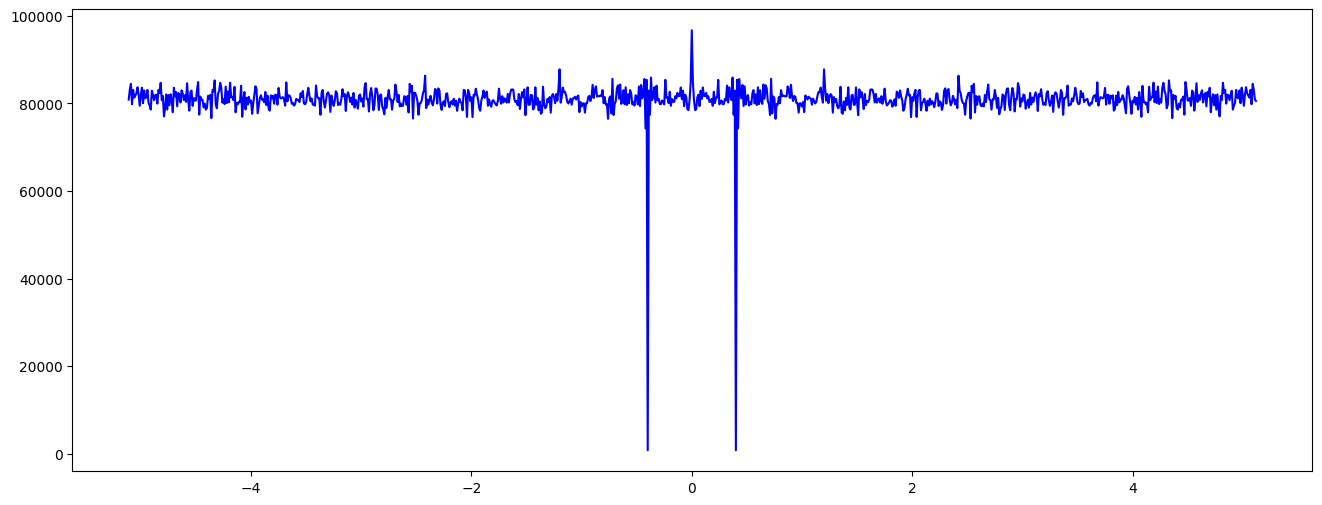

In [83]:
#繪製圖表
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(16,6))
plt.plot(D,Energy,c = "b") 

# Q2
已知 B=1.2、D=0.4，試以 A、C 可能出現的值為 X、Y 軸，Energy(A,B,C,D)為 Z 軸，繪製 3D surface

In [138]:
import numpy as np
def F2(t,A,B,C,D):
    return A*(t**B)+C*np.cos(D*t)+np.random.normal(0,1,t.shape)
def F3(t,A,B,C,D):
    return A*(t**B)+C*np.cos(D*t)

T = np.random.random((1000,1))*100
b2 = F2(T,0.6,1.2,100,0.4)
E = np.zeros((1024,1024))
for a in range(1024):
    for c in range(1024):
        E[a][c]= np.sum(abs(b2-F3(T,(a-511)/100,1.2,c-511,0.4)))
    print(a)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

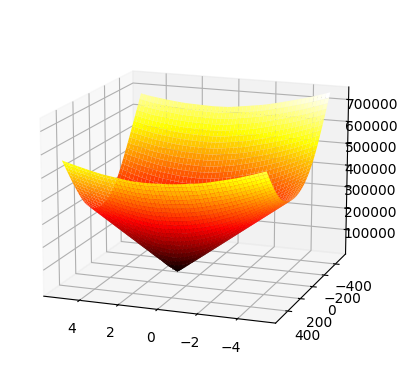

In [141]:
#畫圖
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
A = np.arange(-5.11, 5.13, 0.01)
C = np.arange(-511, 513, 1)

AA,CC = np.meshgrid(A, C)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(AA,CC,E,cmap='hot')
ax.view_init(15, 110)


# Q3
求出的最佳參數組合列出，並將合
成序列與直實序列用兩種顏色繪製於同一張折線圖中。

In [12]:
def gene2coef(gene):
    Beta = (np.sum(2**np.arange(10)*gene[0:10]))/1024
    phi = (np.sum(2**np.arange(10)*gene[10:20]))*(2*np.pi)/1024
    omega = (np.sum(2**np.arange(10)*gene[20:30]))/100
    tc = (np.sum(2**np.arange(2)*gene[30:32]))+731
    return Beta,phi,omega,tc

In [13]:
def F1(t,A,B,C,Beta,phi,omega,tc):
    return A + B*(tc-t)**Beta + B*(tc-t)**Beta*C*np.cos(omega*np.log(tc-t)+phi)

In [30]:
N=10000
G=30
survive_rate = 0.05 #只有5%活下
mutation_rate = 0.001 #突變率 (大:增加嘗試 小:穩定 爸媽好小孩普遍好)
survive= round(N*survive_rate)
mutation = round(N*32*mutation_rate) #每人有32基因


In [31]:
import numpy as np
pop = np.random.randint(0,2,(N,32))
#原始人 N*32個亂數產的0/1
fit = np.zeros((N,1))

In [32]:
import pandas as pd
NVDA=pd.read_csv("NVDA.csv")
close=NVDA['Close']
close.to_numpy
close=np.log(close)
close=close[:734]

In [34]:
for generation in range(G):
    print(generation)
    #先算這10000人有多適合活在這個世界上 越小越好!!
    for i in range(N):
        Beta,phi,omega,tc=gene2coef(pop[i,:])
        
        m=np.zeros((tc,3))
        b=np.zeros((tc,1))
        T=np.arange(0,tc)
        for t in range(0,tc):
            b[t] = close[t]
            m[t,0] = 1
            m[t,1] = (tc-t)**Beta
            m[t,2] = (tc-t)**Beta*np.cos(omega*np.log(tc-t)+phi)
        x=np.linalg.lstsq(m,b,rcond=None)[0]
        A=x[0]
        B=x[1]
        C=x[2]/x[1]
        fit[i]=np.mean(abs(F1(T,A,B,C,Beta,phi,omega,tc)-close[T]))
    #殺人
    sort_fit=np.argsort(fit[:,0]) #排序 小的在前
                        #取index
    pop=pop[sort_fit,:]
    for i in range(survive,N):
        dad_id=np.random.randint(0,survive)
        mom_id=np.random.randint(0,survive)
        #父母不可以自體繁殖
        while(dad_id==mom_id):
            mom_id=np.random.randint(0,survive)
        #基因砟傳
        mask = np.random.randint(0,2,[1,32])
        son = pop[mom_id,:].copy()
        dad = pop[dad_id,:]
        son[mask[0,:]==1] = dad[mask[0,:]==1]
        pop[i,:]=son
    #突變
    for i in range(mutation):
        #挑人
        m=np.random.randint(survive,N)
        #挑基因
        n=np.random.randint(0,32)
        #基因突變 0>1  1>0
        pop[m,n]=1-pop[m,n]


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [35]:
for i in range(N):
        Beta,phi,omega,tc=gene2coef(pop[i,:])
        
        m=np.zeros((tc,3))
        b=np.zeros((tc,1))
        T=np.arange(0,tc)
        for t in range(0,tc):
            b[t] = close[t]
            m[t,0] = 1
            m[t,1] = (tc-t)**Beta
            m[t,2] = (tc-t)**Beta*np.cos(omega*np.log(tc-t)+phi)
        x=np.linalg.lstsq(m,b,rcond=None)[0]
        A=x[0]
        B=x[1]
        C=x[2]/x[1]
        fit[i]=np.mean(abs(F1(T,A,B,C,Beta,phi,omega,tc)-close[T]))
sort_fit=np.argsort(fit[:,0])
pop=pop[sort_fit,:]
#最最最近的答案
Beta,phi,omega,tc=gene2coef(pop[0,:])
for t in range(0,tc):
    b[t] = close[t]
    m[t,0] = 1
    m[t,1] = (tc-t)**Beta
    m[t,2] = (tc-t)**Beta*np.cos(omega*np.log(tc-t)+phi)
x=np.linalg.lstsq(m,b,rcond=None)[0]
A=x[0]
B=x[1]
C=x[2]/x[1]

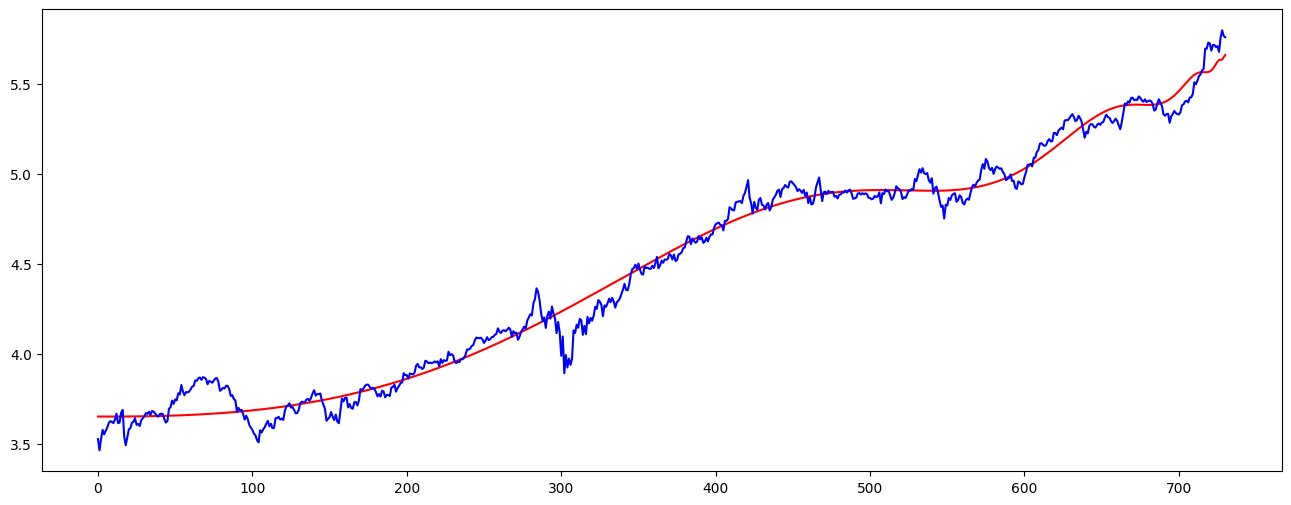

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
T=np.arange(0,tc)
Ans=F1(T,A,B,C,Beta,phi,omega,tc)
plt.figure(figsize=(16,6))
plt.plot(T,Ans,c = "r") 
plt.plot(T,close[:tc],c = "b") 

In [38]:
print(A,B,C,Beta,phi,omega,tc)

[5.67683442] [-0.01624792] [0.16308525] 0.7275390625 1.6260196351587797 4.73 731
